# 可视化分析

## mmyolo环境安装

In [1]:
!git clone -b tutorials https://github.com/open-mmlab/mmyolo.git 

Cloning into 'mmyolo'...
remote: Enumerating objects: 4898, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 4898 (delta 122), reused 221 (delta 105), pack-reused 4609
Receiving objects: 100% (4898/4898), 3.76 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (3006/3006), done.


In [18]:
!/root/miniconda3/envs/myconda/bin/mim install mmyolo

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.12.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 2.1 MB/s eta 0:00:00a 0:00:01


## 特征图可视化

In [10]:
import cv2


img = cv2.imread('mmdetection/cat_dataset/cat1.png')

# print(img.shape)
h,w=img.shape[:2]
resized_img = cv2.resize(img, (640, 640))
cv2.imwrite('mmdetection/cat_dataset/cat1_resize.jpg', resized_img)

True

In [1]:
import os
os.chdir('mmyolo')

### 1、可视化 backbone 输出的 3 个通道

In [19]:
!/root/miniconda3/envs/myconda/bin/python demo/featmap_vis_demo.py \
      ../mmdetection/cat_dataset/cat1_resize.jpg \
      ../mmdetection/cat_dataset/cat_rtmdet_config.py \
      ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth  \
      --target-layers backbone  \
      --channel-reduction squeeze_mean

Loads checkpoint by local backend from path: ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth
06/09 01:32:47 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:984: UserWarning: Since the spatial dimensions of overlaid_image: (640, 640) and featmap: torch.Size([80, 80]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mm

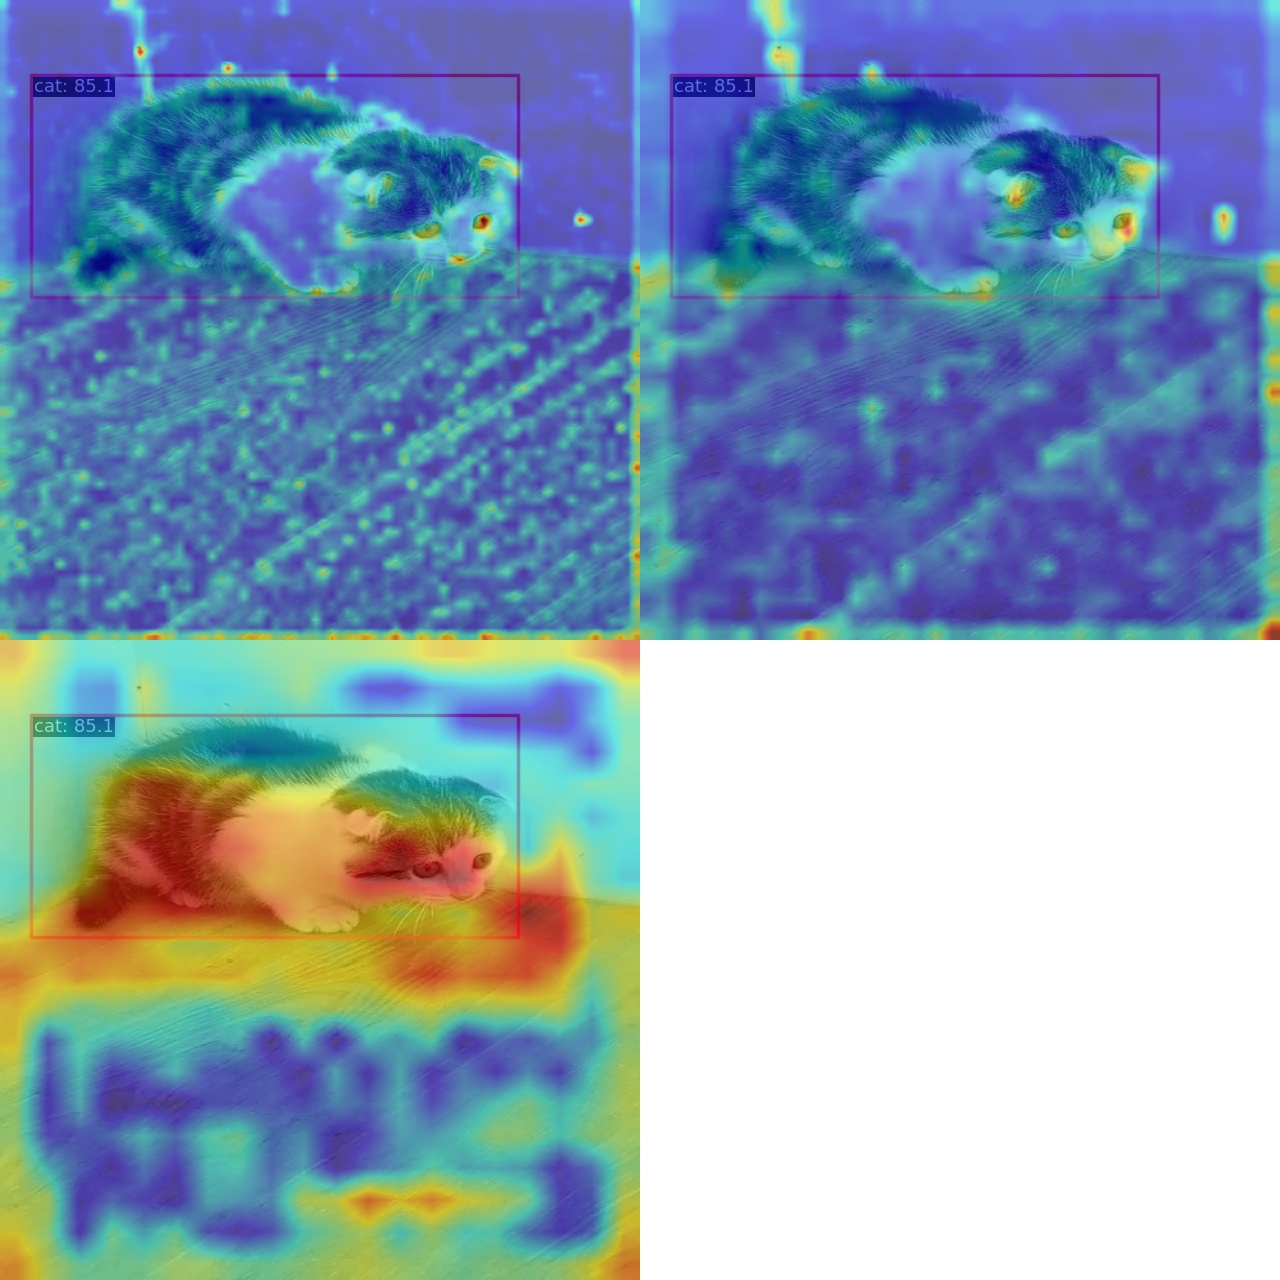

In [21]:
from PIL import Image
Image.open('output/cat1_resize.jpg')     

### 2. 可视化 neck 输出的 3 个通道

In [23]:
!/root/miniconda3/envs/myconda/bin/python demo/featmap_vis_demo.py \
      ../mmdetection/cat_dataset/cat1_resize.jpg \
      ../mmdetection/cat_dataset/cat_rtmdet_config.py \
      ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth  \
      --target-layers neck  \
      --channel-reduction squeeze_mean

Loads checkpoint by local backend from path: ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth
06/09 01:35:58 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:984: UserWarning: Since the spatial dimensions of overlaid_image: (640, 640) and featmap: torch.Size([80, 80]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mm

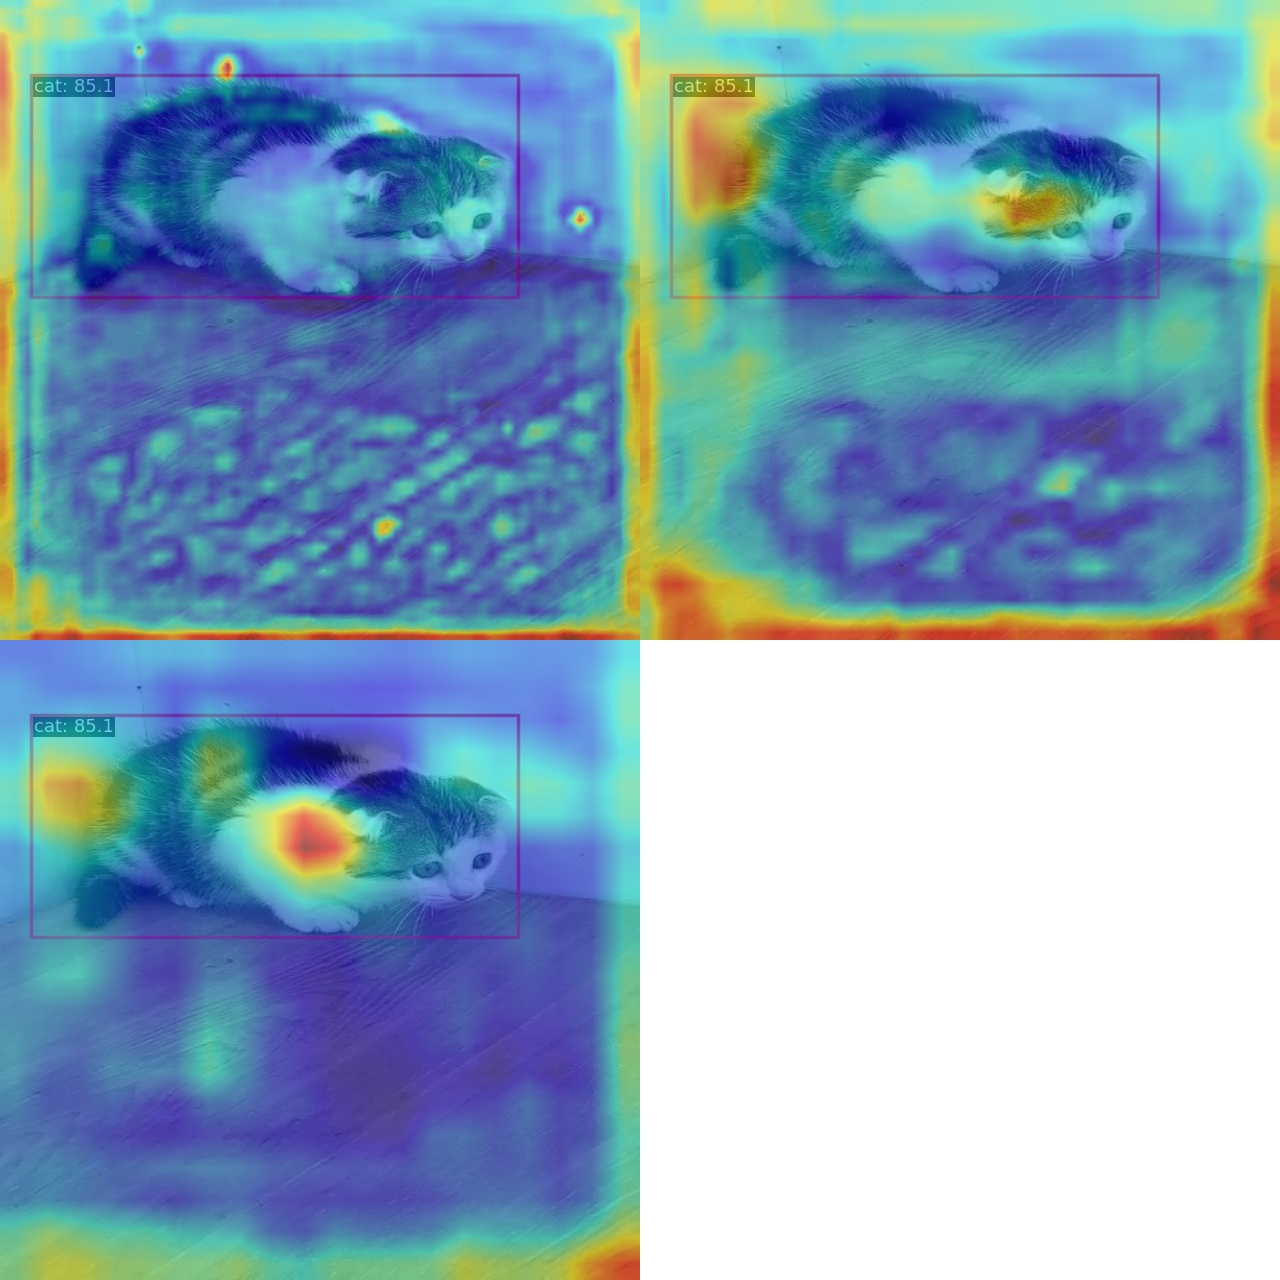

In [25]:
Image.open('output/cat1_resize.jpg')     

## Grad-Based CAM 可视化

In [27]:
!/root/miniconda3/envs/myconda/bin/pip install "grad-cam"

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38241 sha256=449382fa11162158a4f1ab2000e7e3a7818de753e5450612f17473ad7d3f6145
  Stored in directory: /root/.cache/pip/wheels/6c/16/cb/1f4064fc8846c1cd9d029e2561bd809dab8eb6da34f51a1d03
Successfully built grad-cam


### 1、查看 neck 输出的最小输出特征图的 Grad CAM

In [29]:
!/root/miniconda3/envs/myconda/bin/python demo/boxam_vis_demo.py \
      ../mmdetection/cat_dataset/cat1_resize.jpg \
      ../mmdetection/cat_dataset/cat_rtmdet_config.py \
      ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth  \
      --target-layer neck.out_convs[2]
# Image.open('output/cat1_resize.jpg')   

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth
[                                                  ] 0/1, elapsed: 0s, ETA:Traceback (most recent call last):
  File "demo/boxam_vis_demo.py", line 276, in <module>
    main()
  File "demo/boxam_vis_demo.py", line 212, in main
    result = model_wrapper()[0]
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmyolo/utils/boxam_utils.py", line 222, in __call__
    self.detector.bbox_head.head_module.training = False
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1207, in __getattr__
    raise AttributeError("'{}' object has no attribute '{}'".format(
AttributeError: 'RTMDetSepBNHead' object has no attribute 'head_module'


### 2、查看 neck 输出的最大输出特征图的 Grad CAM

In [4]:
!/root/miniconda3/envs/myconda/bin/python demo/boxam_vis_demo.py \
      ../mmdetection/cat_dataset/cat1_resize.jpg \
      ../mmdetection/cat_dataset/cat_rtmdet_config.py \
      ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth  \
      --target-layer neck.out_convs[0]
# Image.open('output/cat1_resize.jpg')  

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth
[                                                  ] 0/1, elapsed: 0s, ETA:Traceback (most recent call last):
  File "demo/boxam_vis_demo.py", line 276, in <module>
    main()
  File "demo/boxam_vis_demo.py", line 212, in main
    result = model_wrapper()[0]
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmyolo/utils/boxam_utils.py", line 222, in __call__
    self.detector.bbox_head.head_module.training = False
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1207, in __getattr__
    raise AttributeError("'{}' object has no attribute '{}'".format(
AttributeError: 'RTMDetSepBNHead' object has no attribute 'head_module'
